In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import pickle

In [2]:
import random 
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,Activation,MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import plot_model

In [3]:
#connecting to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/LooprAI')

['pawn_resized',
 'bishop_resized',
 'Queen-Resized',
 'Rook-resize',
 'knight-resize']

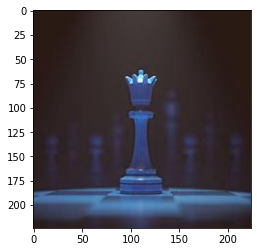

In [5]:
image1 = '/content/drive/My Drive/Colab Notebooks/LooprAI/Queen-Resized/00000003_resized.jpg'

import cv2
fimage1 = cv2.imread(image1)

import matplotlib.pyplot as plt
plt.imshow(fimage1)
plt.show()

In [6]:
import os
import cv2

loc1 = '/content/drive/My Drive/Colab Notebooks/LooprAI/Rook-resize'
loc2 = '/content/drive/My Drive/Colab Notebooks/LooprAI/pawn_resized'
loc3 = '/content/drive/My Drive/Colab Notebooks/LooprAI/knight-resize'
loc4 = '/content/drive/My Drive/Colab Notebooks/LooprAI/Queen-Resized'
loc5 = '/content/drive/My Drive/Colab Notebooks/LooprAI/bishop_resized'

features = []

for img in os.listdir(loc1):
    f = cv2.imread(os.path.join(loc1,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)        #convert colored images into grayscale format
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in os.listdir(loc2):
    f = cv2.imread(os.path.join(loc2,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in os.listdir(loc3):
    f = cv2.imread(os.path.join(loc3,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in os.listdir(loc4):
    f = cv2.imread(os.path.join(loc4,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in os.listdir(loc5):
    f = cv2.imread(os.path.join(loc5,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)

In [7]:
import numpy as np

X = np.array(features)
X.shape

(651, 50, 50)

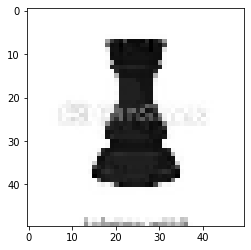

In [8]:
plt.imshow(X[50] , cmap='gray')
plt.show()

In [9]:
labels = []

for img in os.listdir(loc1):
    labels.append(0)
    
for img in os.listdir(loc2):
    labels.append(1)
    
for img in os.listdir(loc3):
    labels.append(2)
    
for img in os.listdir(loc4):
    labels.append(3)
    
for img in os.listdir(loc5):
    labels.append(4)

In [10]:
Y = np.array(labels)
Y.shape

(651,)

In [11]:
print(X.shape)
print(Y.shape)

(651, 50, 50)
(651,)


In [12]:
import keras
from keras.utils import np_utils

In [13]:
X = X.reshape(651,2500)
Y = np_utils.to_categorical(Y)

In [14]:
X = np_utils.normalize(X)

In [15]:
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [17]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()

model.add(layers.Dense(1024 , activation='relu' , input_dim=2500))
model.add(layers.Dense(512 , activation='relu'))
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dense(64 , activation='relu'))

model.add(layers.Dense(5 , activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              2561024   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 5)                 3

In [20]:
#from keras import optimizers
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer=sgd , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [21]:
model.fit(xtrain,ytrain,epochs=1000 , validation_data=(xtest,ytest))

Epoch 1/1000
17/17 [==============================] - 1s 35ms/step - loss: 1.6053 - accuracy: 0.2500 - val_loss: 1.5769 - val_accuracy: 0.2977
Epoch 2/1000
17/17 [==============================] - 0s 19ms/step - loss: 1.5970 - accuracy: 0.2596 - val_loss: 1.5686 - val_accuracy: 0.2977
Epoch 3/1000
17/17 [==============================] - 0s 18ms/step - loss: 1.5937 - accuracy: 0.2596 - val_loss: 1.5576 - val_accuracy: 0.2977
Epoch 4/1000
17/17 [==============================] - 0s 16ms/step - loss: 1.5924 - accuracy: 0.2596 - val_loss: 1.5528 - val_accuracy: 0.2977
Epoch 5/1000
17/17 [==============================] - 0s 15ms/step - loss: 1.5927 - accuracy: 0.2596 - val_loss: 1.5530 - val_accuracy: 0.2977
Epoch 6/1000
17/17 [==============================] - 0s 15ms/step - loss: 1.5921 - accuracy: 0.2596 - val_loss: 1.5482 - val_accuracy: 0.2977
Epoch 7/1000
17/17 [==============================] - 0s 16ms/step - loss: 1.5919 - accuracy: 0.2596 - val_loss: 1.5465 - val_accuracy: 0.2977

In [22]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 6ms/step - loss: 3.2920 - accuracy: 0.4046


[3.2919867038726807, 0.40458014607429504]

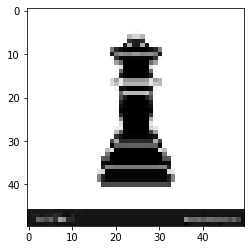

In [23]:
plt.imshow(xtest[5].reshape(50,50) , cmap='gray')
plt.show()

In [31]:
ytest[5]


array([0., 0., 0., 1., 0.], dtype=float32)

In [25]:
model.predict(xtest[5].reshape(1,2500))

1/1 [==============================] - 0s 84ms/step


array([[0.09440623, 0.5103259 , 0.05623474, 0.9380432 , 0.9256574 ]],
      dtype=float32)

In [26]:
np.argmax(model.predict(xtest[5].reshape(1,2500)))

1/1 [==============================] - 0s 15ms/step


3

In [27]:
all

<function all(iterable, /)>